## Plotting a surface label map 

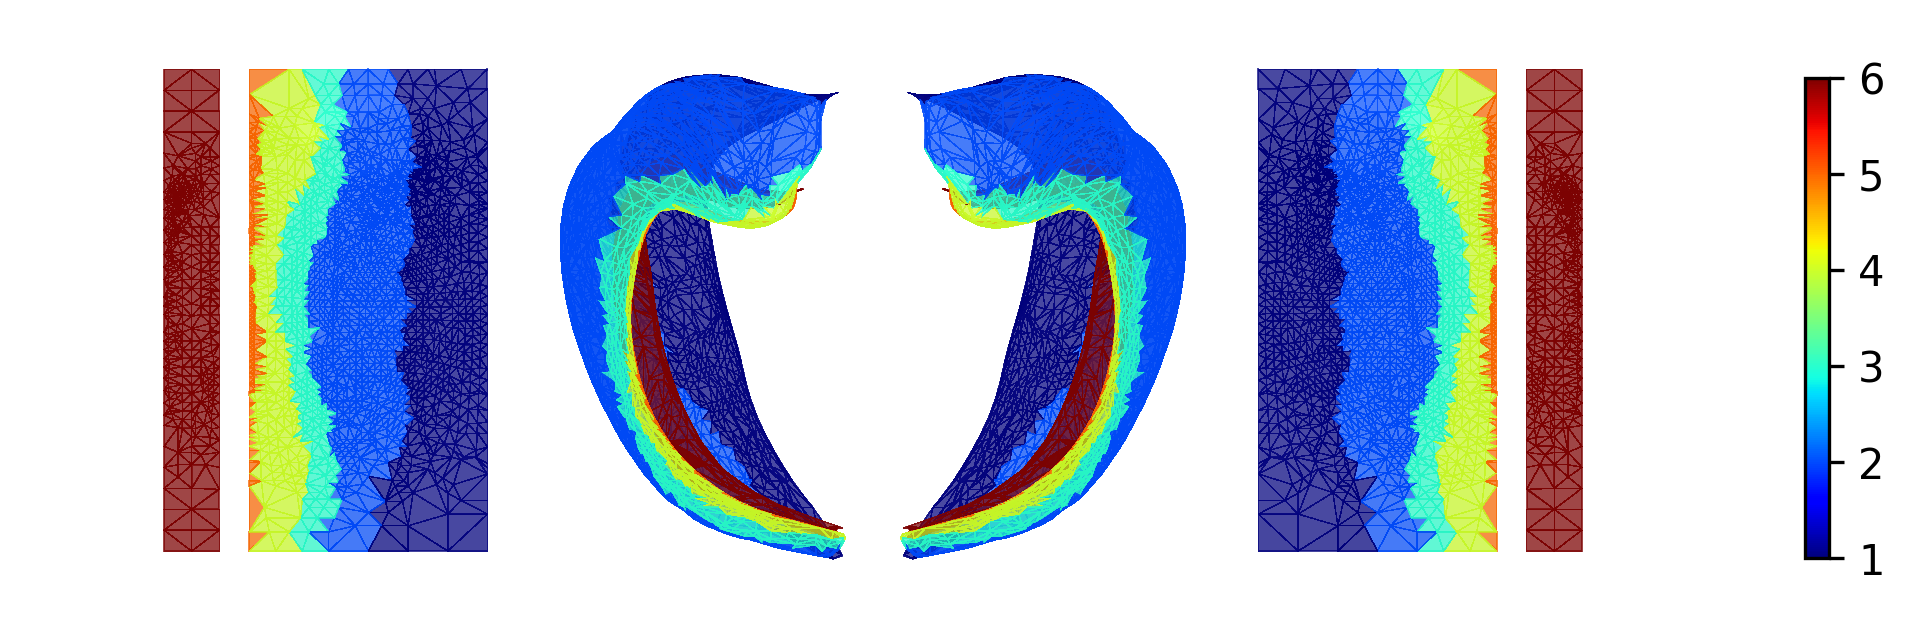

In [1]:
from hippunfold_plot.plotting import plot_hipp_surf
from hippunfold_plot.utils import get_resource_path

#get subfields for demonstrating plotting
label_gii = get_resource_path('tpl-avg_label-hippdentate_density-{density}_subfields.label.gii')

density='1mm'
fig = plot_hipp_surf(label_gii.format(density=density),
                     hemi=None,
                     density=density,
                     cmap='jet',
                     vmin=0,
                     colorbar=True)


In [2]:
#ok, now lets plot some study data on the hippocampus model:
import pandas as pd

data = """Parameter,Model,Subiculum,CA1,CA2,CA3,CA4/DG
Volume,Age,0.17,0.25,0.03,0.27,0.46
Volume,Stress,0.003,0.06,-0.07,0.23,0.41
Myelination,Age,-0.07,-0.07,-0.05,-0.02,-0.05
Myelination,Stress,0.06,0.23,0.25,0.08,0.07"""

# Save to a CSV file
with open("example.csv", "w") as file:
    file.write(data)
    
df = pd.read_csv('example.csv')
df

,Parameter,Model,Subiculum,CA1,CA2,CA3,CA4/DG
0,Volume,Age,0.170,0.25,0.03,0.27,0.46
1,Volume,Stress,0.003,0.06,-0.07,0.23,0.41
2,Myelination,Age,-0.070,-0.07,-0.05,-0.02,-0.05
3,Myelination,Stress,0.060,0.23,0.25,0.08,0.07


In [3]:
import numpy as np
import nibabel as nib

#get the subfields from earlier
subfields = nib.load(label_gii.format(density=density)).agg_data()

model_data = []
subfield_cols = df.columns[3:]
subfield_lut = {'Subiculum':1, 'CA1': 2,'CA2': 3, 'CA3': 4, 'CA4': 5,'CA4/DG':5, 'DG': 6}

for i,row in df.iterrows():
    roi_data = np.zeros(subfields.shape)
    for roi_name in subfield_cols:
        
        roi_data[subfields == subfield_lut[roi_name]] = row[roi_name]
    model_data.append(roi_data)

roi_data = np.hstack(model_data)

In [4]:
roi_data.shape

(2453, 4)

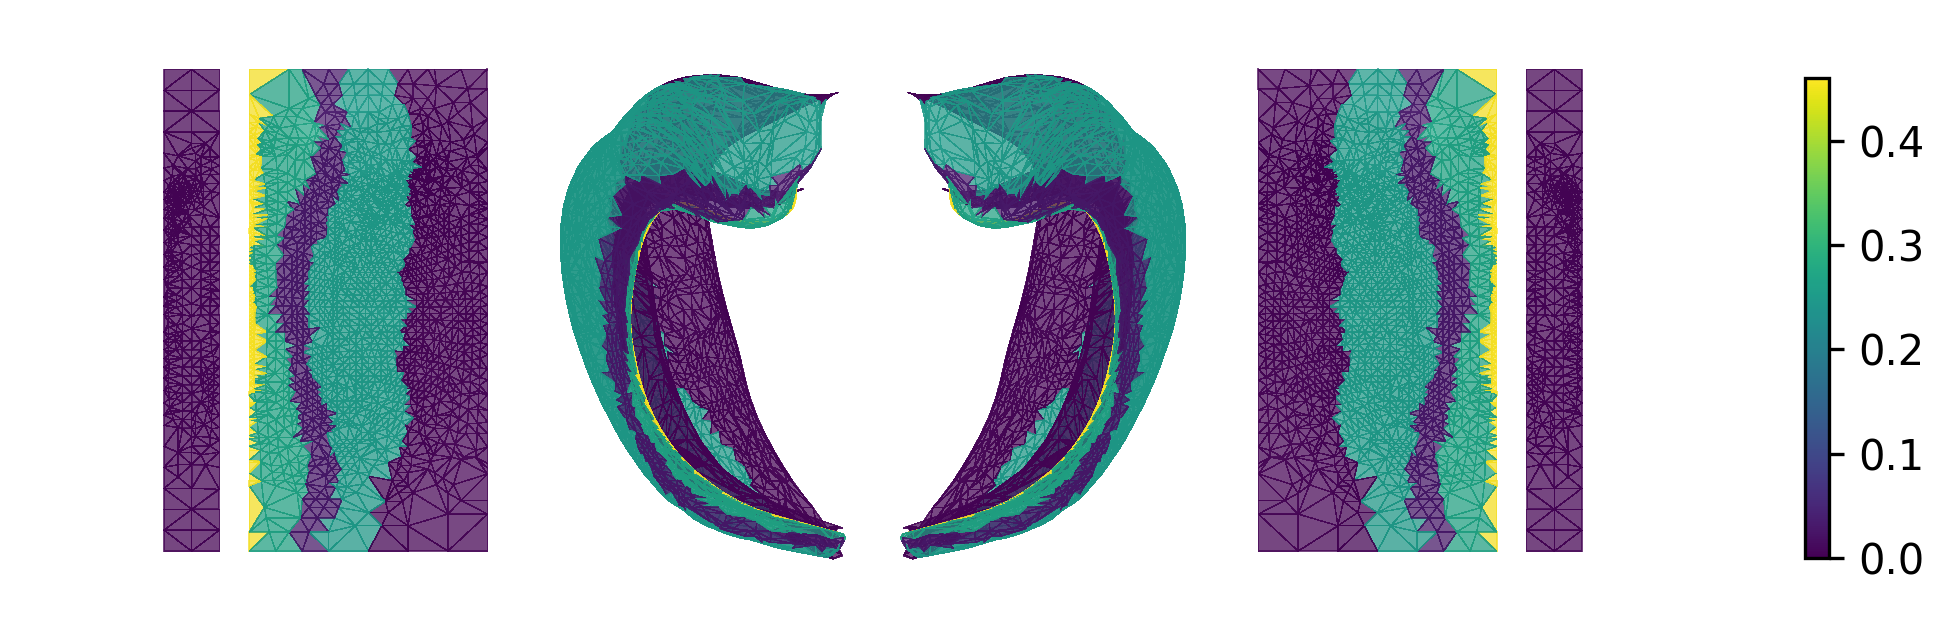

In [5]:

fig = plot_hipp_surf(roi_data[:,0],
                     hemi=None,
                     density=density,
                     cmap='viridis',
                     vmin=0,
                     colorbar=True)